#CNN Model

In [ ]:
CNN_check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/CNN.x",
                                              monitor="val_accuracy",
                                              mode="max",
                                              save_best_only=True,
                                              )

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Reshape

num_features = X_processed.shape[1]  

CNN_model = tf.keras.models.Sequential([
    # Assuming the data is 1D, reshape it to have a 'channels' dimension for Conv1D
    Reshape((num_features, 1), input_shape=(num_features,)),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

CNN_model.build(input_shape=(None, num_features))  
CNN_model.summary()


Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 29, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 27, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)           

In [ ]:
CNN_model.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(X_train, y_train, validation_data=(X_val ,y_val), epochs=10, callbacks=[CNN_check_point])

Epoch 1/10
1725/1725 [==============================] - 25s 13ms/step - loss: 0.6713 - accuracy: 0.6986 - val_loss: 0.6020 - val_accuracy: 0.7109
Epoch 2/10
1725/1725 [==============================] - 21s 12ms/step - loss: 0.6038 - accuracy: 0.7170 - val_loss: 0.5970 - val_accuracy: 0.7137
Epoch 3/10
1725/1725 [==============================] - 20s 12ms/step - loss: 0.5997 - accuracy: 0.7189 - val_loss: 0.5959 - val_accuracy: 0.7225
Epoch 4/10
1725/1725 [==============================] - 20s 11ms/step - loss: 0.5963 - accuracy: 0.7210 - val_loss: 0.5944 - val_accuracy: 0.7200
Epoch 5/10
1725/1725 [==============================] - 20s 11ms/step - loss: 0.5949 - accuracy: 0.7229 - val_loss: 0.5904 - val_accuracy: 0.7238
Epoch 6/10
1725/1725 [==============================] - 19s 11ms/step - loss: 0.5949 - accuracy: 0.7220 - val_loss: 0.5919 - val_accuracy: 0.7266
Epoch 7/10
1725/1725 [==============================] - 17s 10ms/step - loss: 0.5937 - accuracy: 0.7236 - val_loss: 0.5922 -

In [ ]:
CNN_model.save('CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
CNN_model.evaluate(X_test, y_test)

192/192 [==============================] - 1s 4ms/step - loss: 0.5902 - accuracy: 0.7261


[0.5901719927787781, 0.7260720729827881]

192/192 [==============================] - 1s 5ms/step


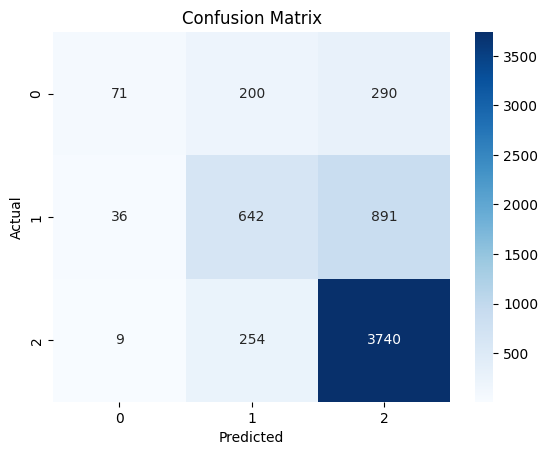

In [ ]:
#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = CNN_model.predict(X_test)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()